# Raupのモデル

Raupのモデル
$$ 
\mathbf{r}(\theta, \phi | W, T, D) = 
W^{\frac{\theta}{2\pi}}
\begin{pmatrix}
  \cos \theta & - \sin \theta & 0 \\
  \sin \theta & \cos \theta & 0\\
  0 & 0 & 1 \\
\end{pmatrix}
\left[
\begin{pmatrix}
  \cos \phi\\
  0 \\
  \sin \phi
\end{pmatrix}
+
\begin{pmatrix}
  \frac{2D}{1-D} + 1\\
  0 \\
  2T\left( \frac{D}{1-D} + 1 \right)
\end{pmatrix}
\right]
$$
に基づく様々な巻きパタンを記述する．

## 準備
パッケージの読み込みや関数の定義をおこなう

In [3]:
#　パッケージの読み込み
%matplotlib notebook
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [4]:
# Raupのモデルに基づいて表面座標を返す関数の定義
def raupSurf(W, T, D, theta, phi):
    w = W**(theta/(2*np.pi))
    X = - w * np.cos(theta) *  (1-  2*D/(-1 + D)+np.cos(phi))
    Y = w* np.sin(theta)*  (1-  2*D/(-1 + D)+np.cos(phi))
    Z = w* (2*T/(- 1 +D) + np.sin(phi))
    return (X, Y , Z)

# 殻表面をプロットするための関数
def plotSurf(X, Y, Z):
    fig = plt.figure()
    ax = fig.gca(projection = '3d')

    ax.set_aspect('equal')
    ax.plot_surface(X, Y, Z)

    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.set_zlabel('z-axis')

    # バウンディングボックス
    max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max()
    Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(X.max()+X.min())
    Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(Y.max()+Y.min())
    Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(Z.max()+Z.min())
    for xb, yb, zb in zip(Xb, Yb, Zb):
        ax.plot([xb], [yb], [zb], 'w')

    plt.grid()
    plt.show()
    
# 殻表面を出力するための関数
def savefigSurf(X, Y, Z, filename):
    fig = plt.figure(dpi = 300)
    ax = fig.gca(projection = '3d')

    ax.set_aspect('equal')
    ax.plot_surface(X, Y, Z)

    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.set_zlabel('z-axis')

    # バウンディングボックス
    max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max()
    Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(X.max()+X.min())
    Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(Y.max()+Y.min())
    Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(Z.max()+Z.min())
    for xb, yb, zb in zip(Xb, Yb, Zb):
        ax.plot([xb], [yb], [zb], 'w')

    plt.grid()
    plt.savefig(filename)

## 実行
Raupのモデルに基づいて計算をおこないプロットする

In [59]:
# 表面座標の計算
thetaRange = np.linspace(0, 9*np.pi, 3600 )
phiRange= np.linspace(0, 2*np.pi, 90)
thetaGrid, phiGrid = np.meshgrid(thetaRange, phiRange)
X, Y, Z = raupSurf( 2, 0., 0,thetaGrid, phiGrid)

<IPython.core.display.Javascript object>


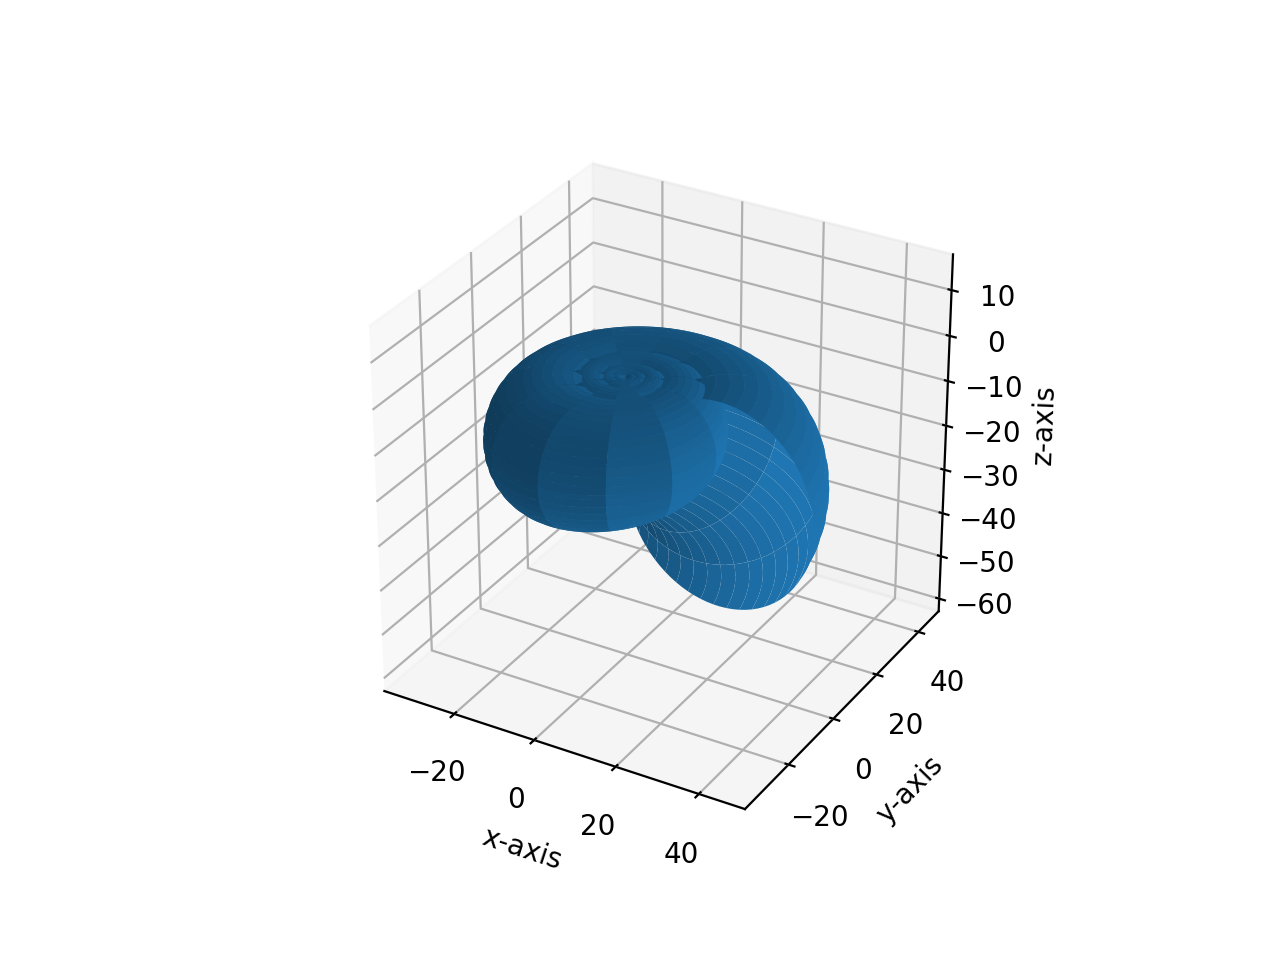

In [60]:
# プロット
plotSurf(X,Y,Z)

<IPython.core.display.Javascript object>


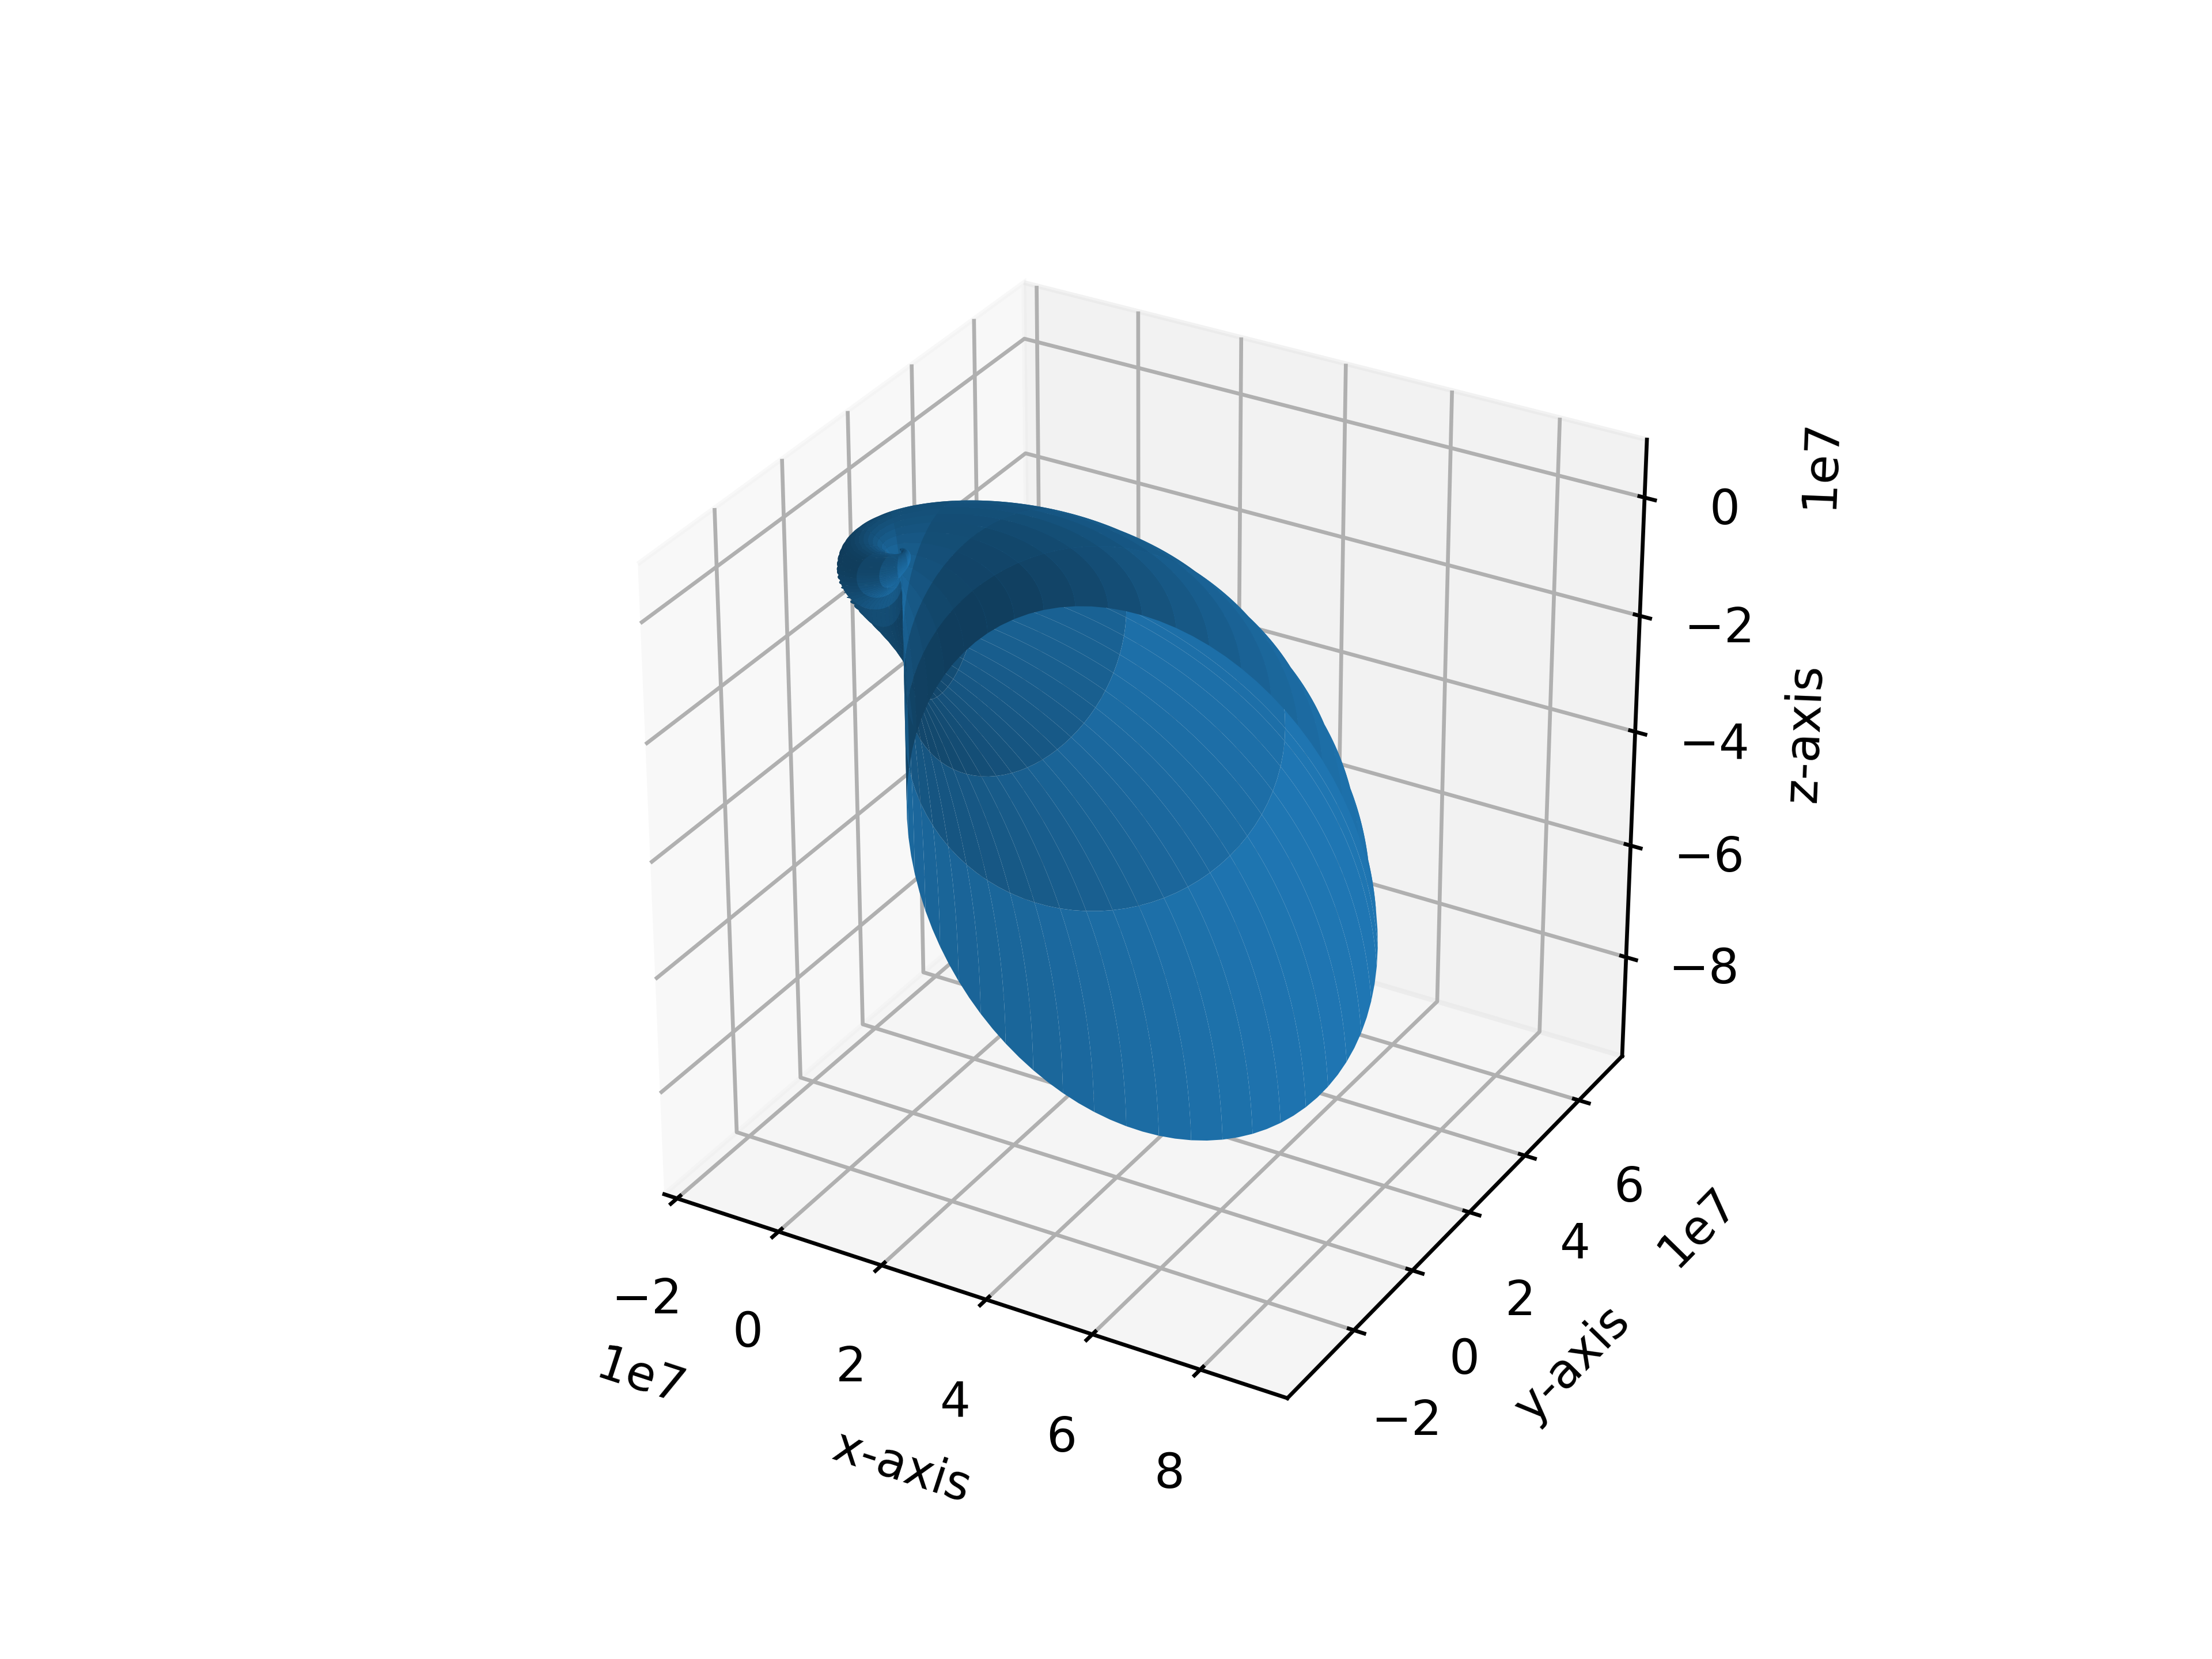

In [56]:
# ファイル出力
savefigSurf(X,Y,Z, "Raup.png")